<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Percent-of-reads-aligned-to-genome" data-toc-modified-id="Percent-of-reads-aligned-to-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Percent of reads aligned to genome</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/Users/siddharth/opt/miniconda3/envs/pymodulon/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the data directory</font>

In [4]:
data_dir = path.join('../data/')
os.listdir(data_dir)

['GO_annotations.csv',
 'kegg_1bm_mapping.csv',
 'ica_runs',
 'multiqc_report.html',
 'gene_info_curated_with_operons.tsv',
 '.DS_Store',
 'iModulon_table.csv',
 'log_tpm_qc.csv',
 'counts.csv',
 'DF_annot_curated_1.tsv',
 'motifs',
 'Sulfolobus_acidocaldarius_2020-08-20.tsv',
 'metadata_qc.csv',
 'eggNOG.annotations',
 'tree_df_saci.csv',
 'gene_info.tsv',
 'log_tpm_norm.csv',
 'gene_info_curated_Jan_07_2021.tsv',
 'GO_annotations.txt',
 'Sulfolobus_acidocaldarius_curated_2020-08-20.tsv',
 'biocyc_smart_table.txt',
 'log_tpm.csv',
 'saci_trn_curated_01_01_2021.tsv',
 'multiqc_stats.tsv',
 'kegg_pathway_enrichments.csv',
 'GO_enrichments.csv',
 'kegg_module_enrichments.csv',
 'kegg_mapping.csv',
 'DF_annot_curated_final.tsv',
 'saci_ica_data.json']

<font size="4">Enter name of curated metadata file here</font>

In [5]:
metadata_file = "Sulfolobus_acidocaldarius_curated_2020-08-20.tsv" # Enter metadata filename here

## Load expression data

In [6]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 2296
Number of samples: 117


In [7]:
DF_log_tpm.head()

,ERX1518397,ERX1518398,ERX1518399,ERX3018360,ERX3018361,ERX3018362,ERX3018363,SRX2548838,SRX2548839,SRX2548840,...,SRX5653264,SRX5653265,SRX5653266,SRX5653267,SRX5653268,SRX5653269,SRX6762909,SRX6762910,SRX6762911,SRX6762912
Geneid,,,,,,,,,,,,,,,,,,,,,
SACI_RS00005,0.000000,0.000000,0.00000,8.903589,8.430008,8.961871,8.595260,8.448594,8.228731,8.368168,...,6.848788,7.185195,7.376186,7.685027,6.601357,7.652005,8.639968,8.791053,8.445832,8.605442
SACI_RS00010,0.000000,0.000000,0.00000,8.103548,7.884489,8.137422,7.954576,7.012592,8.351356,8.608128,...,6.114308,6.546701,6.703395,7.013190,5.926302,6.883948,8.100742,8.554694,8.134199,8.343690
SACI_RS00015,11.275116,11.282262,9.90887,10.824914,11.150282,10.843054,11.120130,9.559263,6.697930,7.179276,...,10.860233,10.735659,10.796574,10.874813,11.073584,10.869027,10.799551,11.091902,10.519661,10.883387
SACI_RS00020,6.535285,0.000000,0.00000,4.920237,5.854611,5.760206,5.885891,6.917147,5.140496,3.635002,...,5.309888,5.338677,5.418699,5.533618,5.420223,5.384989,5.386592,5.732974,5.931306,5.798582
SACI_RS00025,7.016261,0.000000,0.00000,7.904266,8.076969,7.998144,7.867476,7.082449,7.023425,6.744682,...,8.011013,8.092458,8.111934,8.131836,8.261467,8.238378,7.956496,7.930298,7.902762,7.961625


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [8]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 117


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
ERX1518397,8365915,10283,28077,8322765,0,0,0,0,34,0,...,8929982,607238776,3896544,545607801,10.149381,0.0164,0.3196,0.6640,0.0,0.0
ERX1518398,4886827,3864,14010,4866322,0,0,0,0,8,0,...,5489885,373312180,2954939,301318297,19.285169,0.0179,0.4421,0.5400,0.0,0.0
ERX1518399,6932975,8941,20802,6899499,0,0,0,0,6,0,...,7366354,552476550,9876077,515391384,6.712532,0.0201,0.3200,0.6599,0.0,0.0
ERX3018360,11768789,1476962,9912496,236788,0,0,0,0,34413,0,...,11779481,1460655644,6687967,1422787367,2.592553,0.0011,0.0528,0.9461,0.0,0.0
ERX3018361,7611559,921256,6439080,154162,0,0,0,0,23942,0,...,7618684,944716816,4641411,925248512,2.060756,0.0011,0.0499,0.9490,0.0,0.0


## Load metadata

In [10]:
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 117


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,nitrogen_source,aerobicity,supplement,temperature,pH,growth_phase,OD,additional_notes,R1,R2
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX1518397,2016-07-14 11:49:35,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,NextSeq 500,...,(NH4)2SO4(1.3),NaN,0.1% Tryptophan (Difco),NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX1518398,2016-07-14 11:49:35,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,NextSeq 500,...,(NH4)2SO4(1.3),NaN,0.1% Tryptophan (Difco),NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX1518399,2016-07-14 11:49:35,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,NextSeq 500,...,(NH4)2SO4(1.3),NaN,0.1% Tryptophan (Difco),NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX3018360,2019-01-24 13:14:25,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX3018361,2019-01-24 13:14:25,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove extra sample rows

In [11]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [13]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

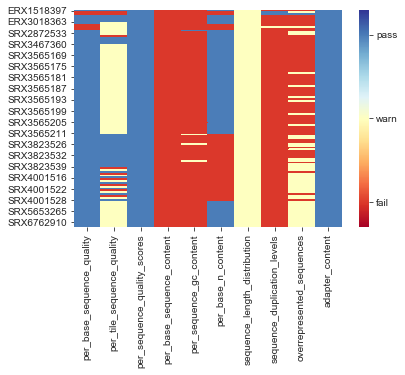

In [14]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [15]:
# Remove per_base_n_content from fail cols
#fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','adapter_content']

In [16]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,adapter_content
ERX1518398,fail,pass,pass
ERX1518399,fail,pass,pass
SRX2548839,fail,pass,pass
SRX2548840,fail,pass,pass
SRX2781382,fail,pass,pass


<font size="4">Mark samples as failed.</font>

In [17]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Percent of reads aligned to genome

In [18]:
min_pct_aligned

40

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

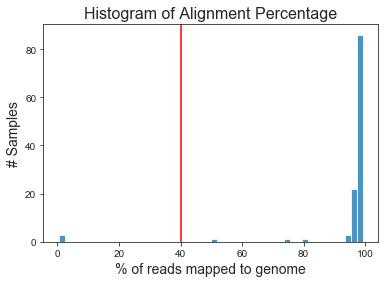

In [19]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['reads_aligned_percentage'],bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

In [20]:
percent_alignment = DF_qc_stats['reads_aligned_percentage']
percent_alignment

ERX1518397     0.52
ERX1518398     0.42
ERX1518399     0.48
ERX3018360    97.99
ERX3018361    97.97
              ...  
SRX5653269    98.04
SRX6762909    97.91
SRX6762910    97.61
SRX6762911    98.06
SRX6762912    97.79
Name: reads_aligned_percentage, Length: 117, dtype: float64

In [21]:
DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
DF_failed_mapping

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ERX1518397,8365915,10283,28077,8322765,0,0,0,0,34,0,...,8929982,607238776,3896544,545607801,10.149381,0.0164,0.3196,0.6640,0.0,0.0
ERX1518398,4886827,3864,14010,4866322,0,0,0,0,8,0,...,5489885,373312180,2954939,301318297,19.285169,0.0179,0.4421,0.5400,0.0,0.0
ERX1518399,6932975,8941,20802,6899499,0,0,0,0,6,0,...,7366354,552476550,9876077,515391384,6.712532,0.0201,0.3200,0.6599,0.0,0.0


In [22]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [23]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

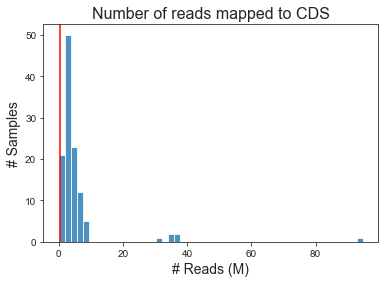

In [24]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [25]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ERX1518398,4886827,3864,14010,4866322,0,0,0,0,8,0,...,5489885,373312180,2954939,301318297,19.285169,0.0179,0.4421,0.5400,0.0,0.0
ERX1518399,6932975,8941,20802,6899499,0,0,0,0,6,0,...,7366354,552476550,9876077,515391384,6.712532,0.0201,0.3200,0.6599,0.0,0.0
ERX1518397,8365915,10283,28077,8322765,0,0,0,0,34,0,...,8929982,607238776,3896544,545607801,10.149381,0.0164,0.3196,0.6640,0.0,0.0


<font size="4">Mark samples as failed.</font>

In [26]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  8


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

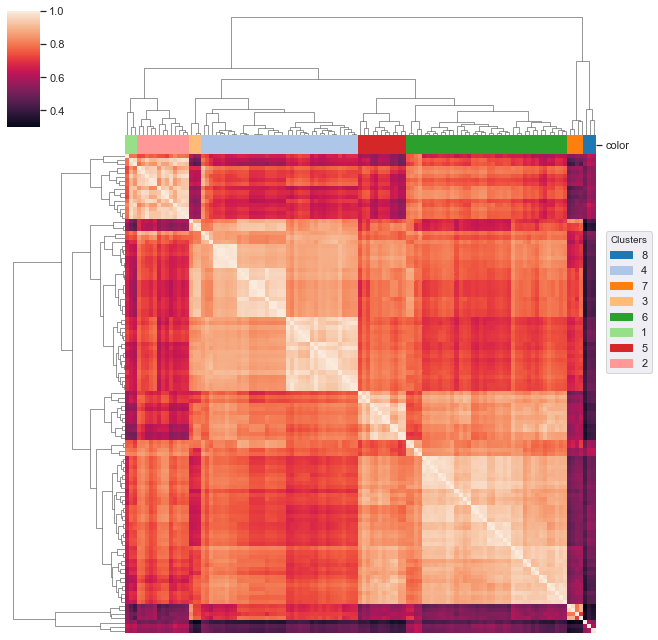

In [28]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [29]:
#indicate which clusters you want to remove
remove_clst = [7,8]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [30]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [31]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,pH,growth_phase,OD,additional_notes,R1,R2,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
ERX1518397,2016-07-14 11:49:35,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
ERX1518398,2016-07-14 11:49:35,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
ERX1518399,2016-07-14 11:49:35,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
ERX3018360,2019-01-24 13:14:25,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
ERX3018361,2019-01-24 13:14:25,330779,Sulfolobus acidocaldarius DSM 639,2285,183924,330779,Sulfolobus acidocaldarius,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True


# Remove failed samples

In [32]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_pct_reads_mapped',
              'passed_global_correlation']

In [33]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

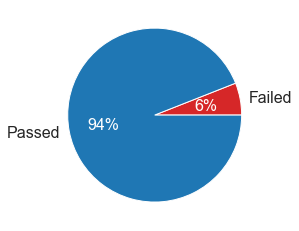

In [35]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

#plt.savefig('../data/figures/pie.svg')

In [37]:
DF_metadata.shape

(117, 52)

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [35]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA453776    18
PRJNA439217    18
PRJNA526225     8
PRJNA531435     6
PRJEB30507      4
PRJNA422245     4
PRJNA388657     2
PRJNA403207     1
PRJNA403199     1
PRJNA403196     1
PRJNA403230     1
PRJNA403219     1
PRJNA403200     1
PRJNA403227     1
PRJNA373915     1
PRJNA403181     1
PRJNA403187     1
PRJNA403208     1
PRJNA403235     1
PRJNA403202     1
PRJNA403222     1
PRJNA403213     1
PRJNA403223     1
PRJNA403188     1
PRJNA403209     1
PRJNA403228     1
PRJNA403186     1
PRJNA403218     1
PRJNA403225     1
PRJNA403216     1
PRJNA403231     1
PRJNA213193     1
PRJNA403197     1
PRJNA403236     1
PRJNA403229     1
PRJNA403205     1
PRJNA403201     1
PRJNA403180     1
PRJNA403220     1
PRJNA403198     1
PRJNA403221     1
PRJNA403211     1
PRJNA403206     1
PRJNA403189     1
PRJNA403204     1
PRJNA403203     1
PRJNA403195     1
PRJNA403190     1
PRJNA403217     1
PRJNA403214     1
PRJNA403182     1
PRJNA403224     1
PRJNA403191     1
PRJNA403192     1
PRJNA403183     1
PRJNA40322

## BioProject counts of all metadata

In [36]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA453776    18
PRJNA439217    18
PRJNA526225     8
PRJNA531435     6
PRJNA373915     5
PRJEB30507      4
PRJNA422245     4
PRJEB14292      3
PRJNA388657     2
PRJNA403230     1
PRJNA403231     1
PRJNA403208     1
PRJNA403199     1
PRJNA403196     1
PRJNA403227     1
PRJNA403219     1
PRJNA403207     1
PRJNA403235     1
PRJNA403187     1
PRJNA403181     1
PRJNA403209     1
PRJNA403182     1
PRJNA403223     1
PRJNA403188     1
PRJNA403201     1
PRJNA403228     1
PRJNA403186     1
PRJNA403218     1
PRJNA403225     1
PRJNA403216     1
PRJNA403197     1
PRJNA403202     1
PRJNA403222     1
PRJNA403236     1
PRJNA403213     1
PRJNA403220     1
PRJNA403203     1
PRJNA403195     1
PRJNA403183     1
PRJNA403204     1
PRJNA403189     1
PRJNA403206     1
PRJNA403211     1
PRJNA403221     1
PRJNA403198     1
PRJNA403217     1
PRJNA403191     1
PRJNA403214     1
PRJNA403224     1
PRJNA403192     1
PRJNA403180     1
PRJNA403226     1
PRJNA403190     1
PRJNA403229     1
PRJNA213193     1
PRJNA40320

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [37]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [38]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project'].str.cat(DF_metadata_passed.loc[:,'condition'],sep=':')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [39]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [40]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/5995.0 [00:00<?, ?it/s]

In [41]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.98


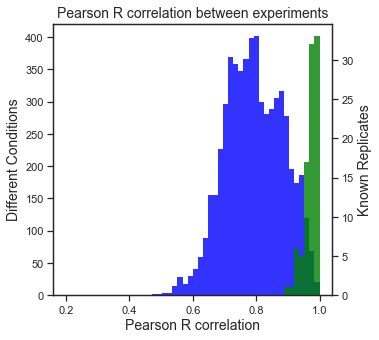

In [42]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [43]:
#pearson r cutoff for replicates
rcutoff = 0.95

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

## Drop Samples with no replicates

In [44]:
cond_counts = DF_metadata_passed.condition.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['75_3.5_log', 'nc_rna5', '65_1.6_stat', '65_3.5_log', 'nc_rna6',
       'nc_rna8', 'nc_rna7'],
      dtype='object')

In [45]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition.isin(drop_conds)

In [46]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [47]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [48]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [49]:
# Remove Dup project (this is a duplicate of the FadR project)
DF_metadata_final = DF_metadata_final.drop(index=['ERX3018360', 'ERX3018361', 'ERX3018362', 'ERX3018363'])

In [50]:
DF_metadata_final.shape

(95, 55)

In [51]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [46]:
final_pie = {
    'Passed': 95,
    'Failed': 22
}

pd.Series(final_pie).sort_values()

Failed    22
Passed    95
dtype: int64

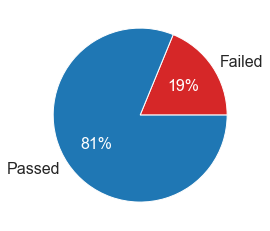

In [48]:
_,_,pcts = plt.pie(pd.Series(final_pie).sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

plt.savefig('../figures/final_pie.svg')

# Save final datasets

In [52]:
DF_log_tpm_final.to_csv(os.path.join(data_dir,'log_tpm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(data_dir,'metadata_qc.csv'))